> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> list of questions:


>1-what are the relation between the movies rating and popularity ??


>2-what is the most productive years ?


>3-what happend to the movies budget what is it's effect on the profit and the run time over the years ?


>4-what is the most prfitable years ?

In [59]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [60]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [61]:
#Drop unwanted column
df.drop(['production_companies','original_title','director','overview','tagline','homepage','cast','id','imdb_id','keywords','release_date','budget_adj','revenue_adj','genres'],inplace=True,axis=1)
df.info()
df.drop_duplicates(inplace = True)
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   runtime       10866 non-null  int64  
 4   vote_count    10866 non-null  int64  
 5   vote_average  10866 non-null  float64
 6   release_year  10866 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 594.3 KB


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [62]:
#getting the years in our dataset
years_list=[]
for x in df['release_year']:
    if x not in years_list:
        years_list.append(x)
years_list.sort()

In [69]:
#getting our study information year by year
av_budget=[]
av_revenue=[]
av_popularity=[]
av_vote_count=[]
av_vote_average =[]
av_runtime=[]
for x in years_list:
    av_budget.append(df[df['release_year']==x]['budget'].mean())
    av_revenue.append(df[df['release_year']==x]['revenue'].mean())
    av_popularity.append(df[df['release_year']==x]['popularity'].mean())
    av_vote_count.append(df[df['release_year']==x]['vote_count'].mean())
    av_vote_average.append(df[df['release_year']==x]['vote_average'].mean())
    av_runtime.append(df[df['release_year']==x]['runtime'].mean())
    av_profit=np.array(av_revenue)-np.array(av_budget)
dfmod=pd.DataFrame({'years':years_list,'av_budget':av_budget,'av_revenue':av_revenue,'av_popularity':av_popularity,'av_vote_count':av_vote_count,'av_rating':av_vote_average,'av_runtime':av_runtime,'av_profit':av_profit})
dfmod.describe()


,years,av_budget,av_revenue,av_popularity,av_vote_count,av_rating,av_runtime,av_profit
count,56.000000,5.600000e+01,5.600000e+01,56.000000,56.000000,56.000000,56.000000,5.600000e+01
mean,1987.500000,9.828067e+06,3.075392e+07,0.559551,156.476682,6.104808,105.705088,2.092585e+07
std,16.309506,8.019158e+06,1.573193e+07,0.128254,73.960689,0.199980,5.522549,9.121204e+06
min,1960.000000,6.892796e+05,1.842102e+06,0.304112,31.739130,5.799830,96.044006,5.909106e+05
25%,1973.750000,2.426431e+06,1.815642e+07,0.469625,98.832785,5.960597,101.910776,1.585978e+07
50%,1987.500000,6.906936e+06,3.255497e+07,0.546928,139.040793,6.041295,105.678699,2.284545e+07
75%,2001.250000,1.645743e+07,4.288089e+07,0.626697,206.473666,6.242106,107.593247,2.695966e+07
max,2015.000000,2.573766e+07,5.549569e+07,1.030657,325.471927,6.703636,124.343750,3.594547e+07


<a id='eda'></a>
## Exploratory Data Analysis

>what are the relation between the movies rating and popularity ??

Text(0.5, 1.0, 'rating VS popularity')

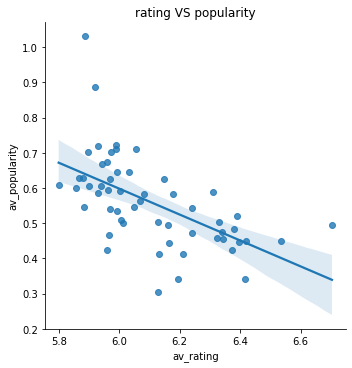

In [64]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
sns.lmplot(data=dfmod,x='av_rating',y='av_popularity')
plt.title('rating VS popularity')

## As we saw here the most popular years has relativly law rating average.


>what is the most productive years ?

Text(0.5, 1.0, 'Movies produced yearly')

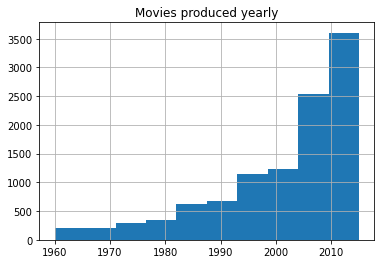

In [65]:
df['release_year'].hist()
plt.title('Movies produced yearly')

## It is clear that the cinema market is growing as the productivity increase year by year .

>what happend to the movies budget what is it's effect on the profit and the run time over the years ??

Text(0.5, 1.0, 'Runtime over the years taking revenue in consederation')

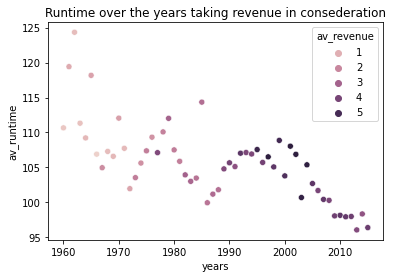

In [66]:
# Continue to explore the data to address your additional research
sns.scatterplot(data=dfmod,x='years',y='av_runtime',hue='av_revenue')
plt.title('Runtime over the years taking revenue in consederation')


## It is obvious that the runtime decreased over the years but we must notice the increase in the revenue in the same time.

>what is the most prfitable years ?

Text(0.5, 1.0, 'years VS average profit')

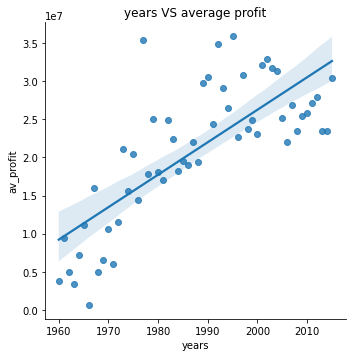

In [67]:
sns.lmplot(data=dfmod,x='years',y='av_profit')
plt.title('years VS average profit')

## The average profit increaced over the years but stated to go down !!

<a id='conclusions'></a>
## Conclusions

> As I presented in my report the runtime decreased dramaticaly over the years as the films rating average too even though the popularity increased as the profit acordingly but the budget gone up in the start of the century but started to go down after then as the profit did .
so as a conclution the quality of the movies rose to draw investment then it started to go totaly in commercial way seeking profit and popularity but this journey coming to it's end.

>## limitations:
>1-We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime.


>2-Our analysis is limited to only the provided dataset.


> 3-For example, the dataset does not confirm that every release of every director is listed.


>4-There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.


>5-Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.